# Lecture

In [1]:
import darts.datasets as ds
import IPython.display as dp
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
import statsmodels.tsa.api as sm
from darts import TimeSeries

dp.set_matplotlib_formats("retina")
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_69757/4025387531.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


<Figure size 640x480 with 0 Axes>

## ACF and stationarity of MA(1)

Consider $MA(1)$ process with $\beta_0 = 1, \beta_1 = \theta$:
$$
X_t = Z_t + \theta Z_{t-1}
$$

The ACF of $MA(q)$ is given by:
$$
\rho(k) = \begin{cases}
1, & k = 0, \\
\sum\limits_{i=0}^{q-k} \beta_i \beta_{i+k} \big/\sum\limits_{i=0}^{q} \beta_i^2 , & 1 \leqslant k \leqslant q, \\
0, & k > q, \\
\gamma(-k), & k < 0
\end{cases}
$$

The ACF of our $MA(1)$ is then given by:
$$
\rho(k) = \begin{cases}
1, & k = 0, \\
\theta \big/ (1 + \theta^2), & k = \pm 1, \\
0, & \text{else}
\end{cases}
$$

Check ACF for $\tilde{\theta} = \frac1\theta$.

The process expressed with backward shift operator is:
$$
X_t = (\beta_0 + \beta_1 B + \ldots + \beta_q B^q) Z_t = \theta(B) Z_t
$$

Then the polynomial for our $MA(1)$ is:
$$
\theta(B) = 1 + \theta B
$$

Its root is $ - \frac1\theta$, and it lies outside unit circle if $|\theta| < 1$. So $MA(1)$ is invertible if $|\theta| < 1$.

## ACF and stationarity of AR(1)

Consider $AR(1)$ process:
$$
X_t = \alpha X_{t-1} + Z_t
$$

With backward shift operator, we get
$$
Z_t = (1 - \alpha B) X_t
$$
or
$$
X_t = (1 - \alpha B)^{-1} Z_t = (1 + \alpha B + \alpha^2 B + \ldots) Z_t
$$

From this representation:
$$
\begin{aligned}
\mathbb{E}[X_t] & = 0, \\
\operatorname{Var}(X_t) & = \sigma^2_Z (1 + \alpha^2 + \alpha^4 + \ldots) = \sigma^2_Z / (1 - \alpha^2)
\end{aligned}
$$

ACVF is given by:
$$
\gamma(k) = \mathbb{E}[X_t X_{t+k}] = \mathbb{E}\left[ \left( \sum_{i=0}^\infty \alpha^i Z_{t-i} \right) \left( \sum_{j=0}^\infty \alpha^j Z_{t+k-j} \right) \right] = \sigma^2_Z \sum_{i=0}^\infty \alpha^i \alpha^{k+i} = \sigma^2_Z \alpha^k \sum_{i=0}^\infty \alpha^{2i} = \sigma^2_Z \alpha^k \big/ (1 - \alpha^2) = \alpha^k \sigma^2_X
$$

ACF is then given by
$$
\rho(k) = \gamma(k) / \sigma^2_X = \alpha^k
$$

The process is stationary provided that $|\alpha| < 1$.

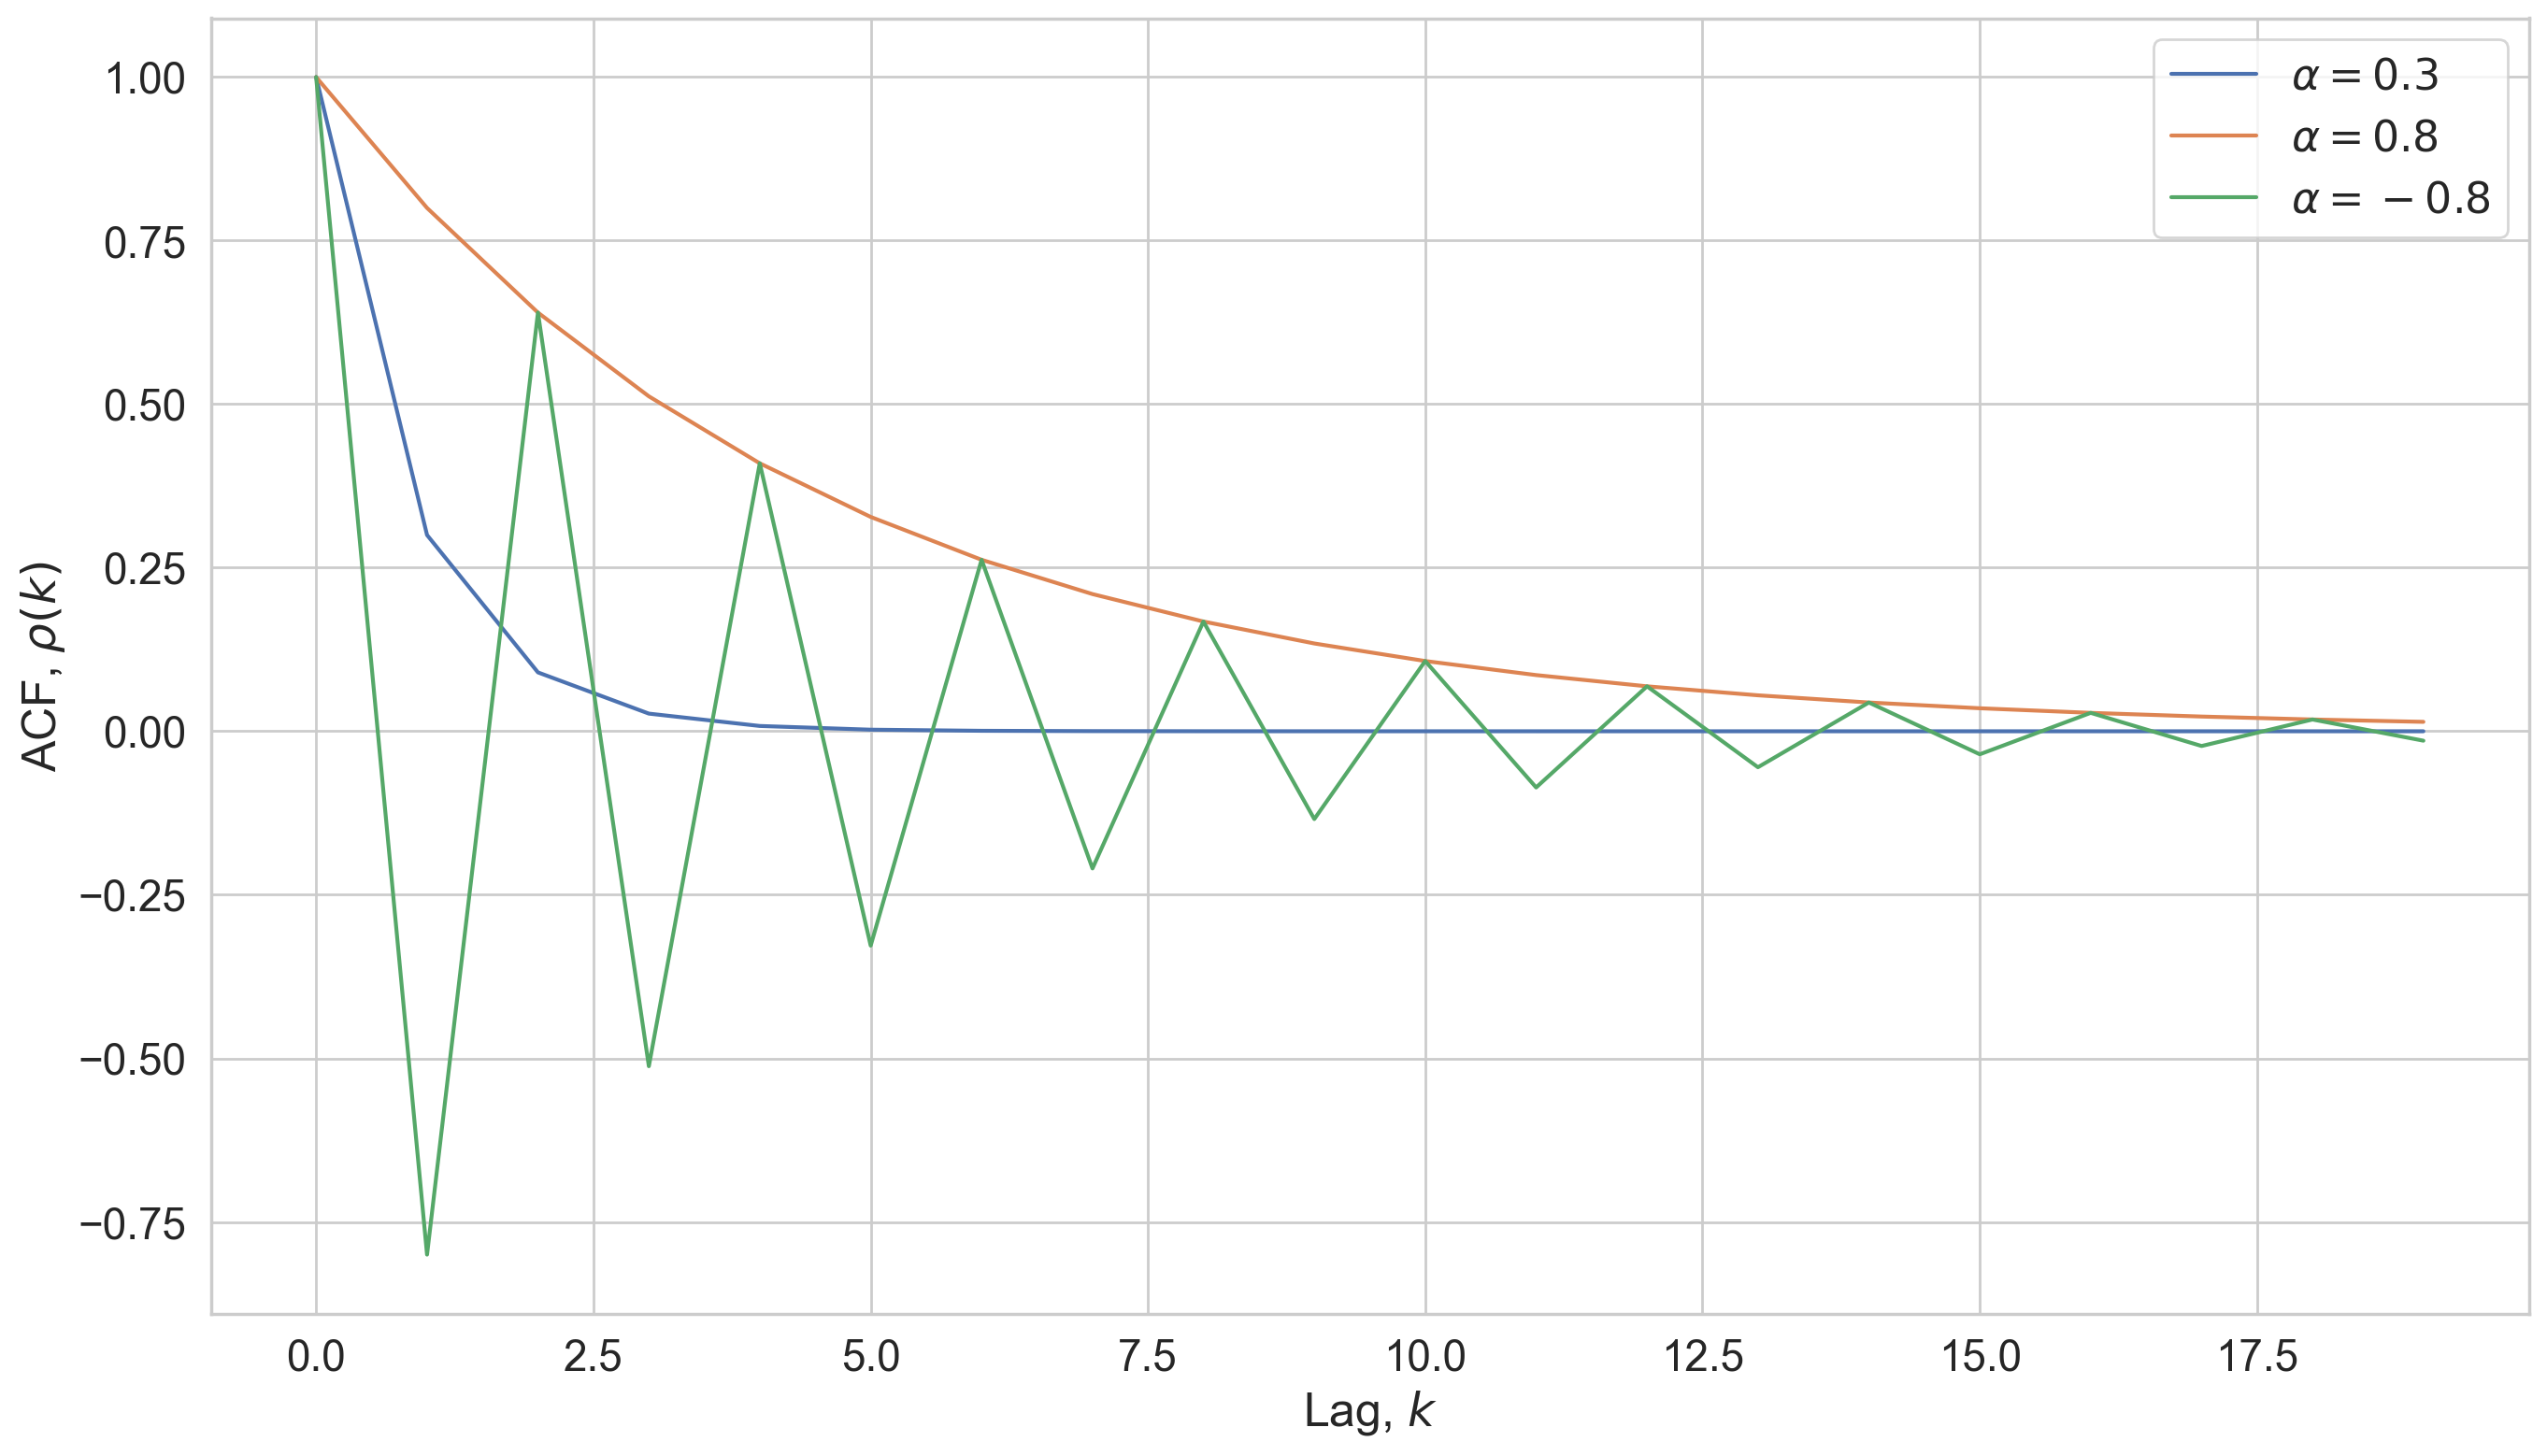

In [5]:
kk = np.arange(20)
acf_ar_1_03 = 0.3**kk
acf_ar_1_08 = 0.8**kk
acf_ar_1_m08 = (-0.8) ** kk
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(kk, acf_ar_1_03, label="$\\alpha = 0.3$")
ax.plot(kk, acf_ar_1_08, label="$\\alpha = 0.8$")
ax.plot(kk, acf_ar_1_m08, label="$\\alpha = - 0.8$")
ax.set_xlabel("Lag, $k$")
ax.set_ylabel("ACF, $\\rho(k)$")
ax.legend();

## ACF and stationarity of AR(2)

Consider $AR(2)$ process
$$
X_t = \alpha_1 X_{t-1} + \alpha_2 X_{t-2} + Z_t
$$

With backward shift operator, we get
$$
Z_t = (1 - \alpha B - \alpha^2 B^2) X_t
$$

As discussed last time, the ACF can be found from Yule-Walker equations
$$
\rho(k) = \alpha_1 \rho(k-1) + \ldots + \alpha_p \rho(k-p)
$$
for which the general solution is
$$
\rho(k) = A_1 \pi_1^{|k|} + \ldots + A_p \pi_p^{|k|}
$$
where $\pi_i$ are the roots of the so-called auxiliary equation
$$
y^p - \alpha_1 y^{p-1} - \ldots - \alpha_p = 0
$$

In case of $AR(2)$, the auxiliary equation writes
$$
y^2 - \alpha_1 y - \alpha_2 = 0
$$

So we get stationarity if
$$
\left| \frac{\alpha_1 \pm \sqrt{\alpha_1^2 + 4 \alpha_2}}{2} \right| < 1 \Leftrightarrow \begin{cases}
\alpha_1 + \alpha_2 & < 1, \\
\alpha_1 - \alpha_2 & > -1, \\
\alpha_2 & > -1
\end{cases}
$$

If the discriminant is positive, thes roots are real, and the ACF behaves like exponential decay. If discriminant is negative, the roots are complex, and ACF behaves like damped sinusoid.

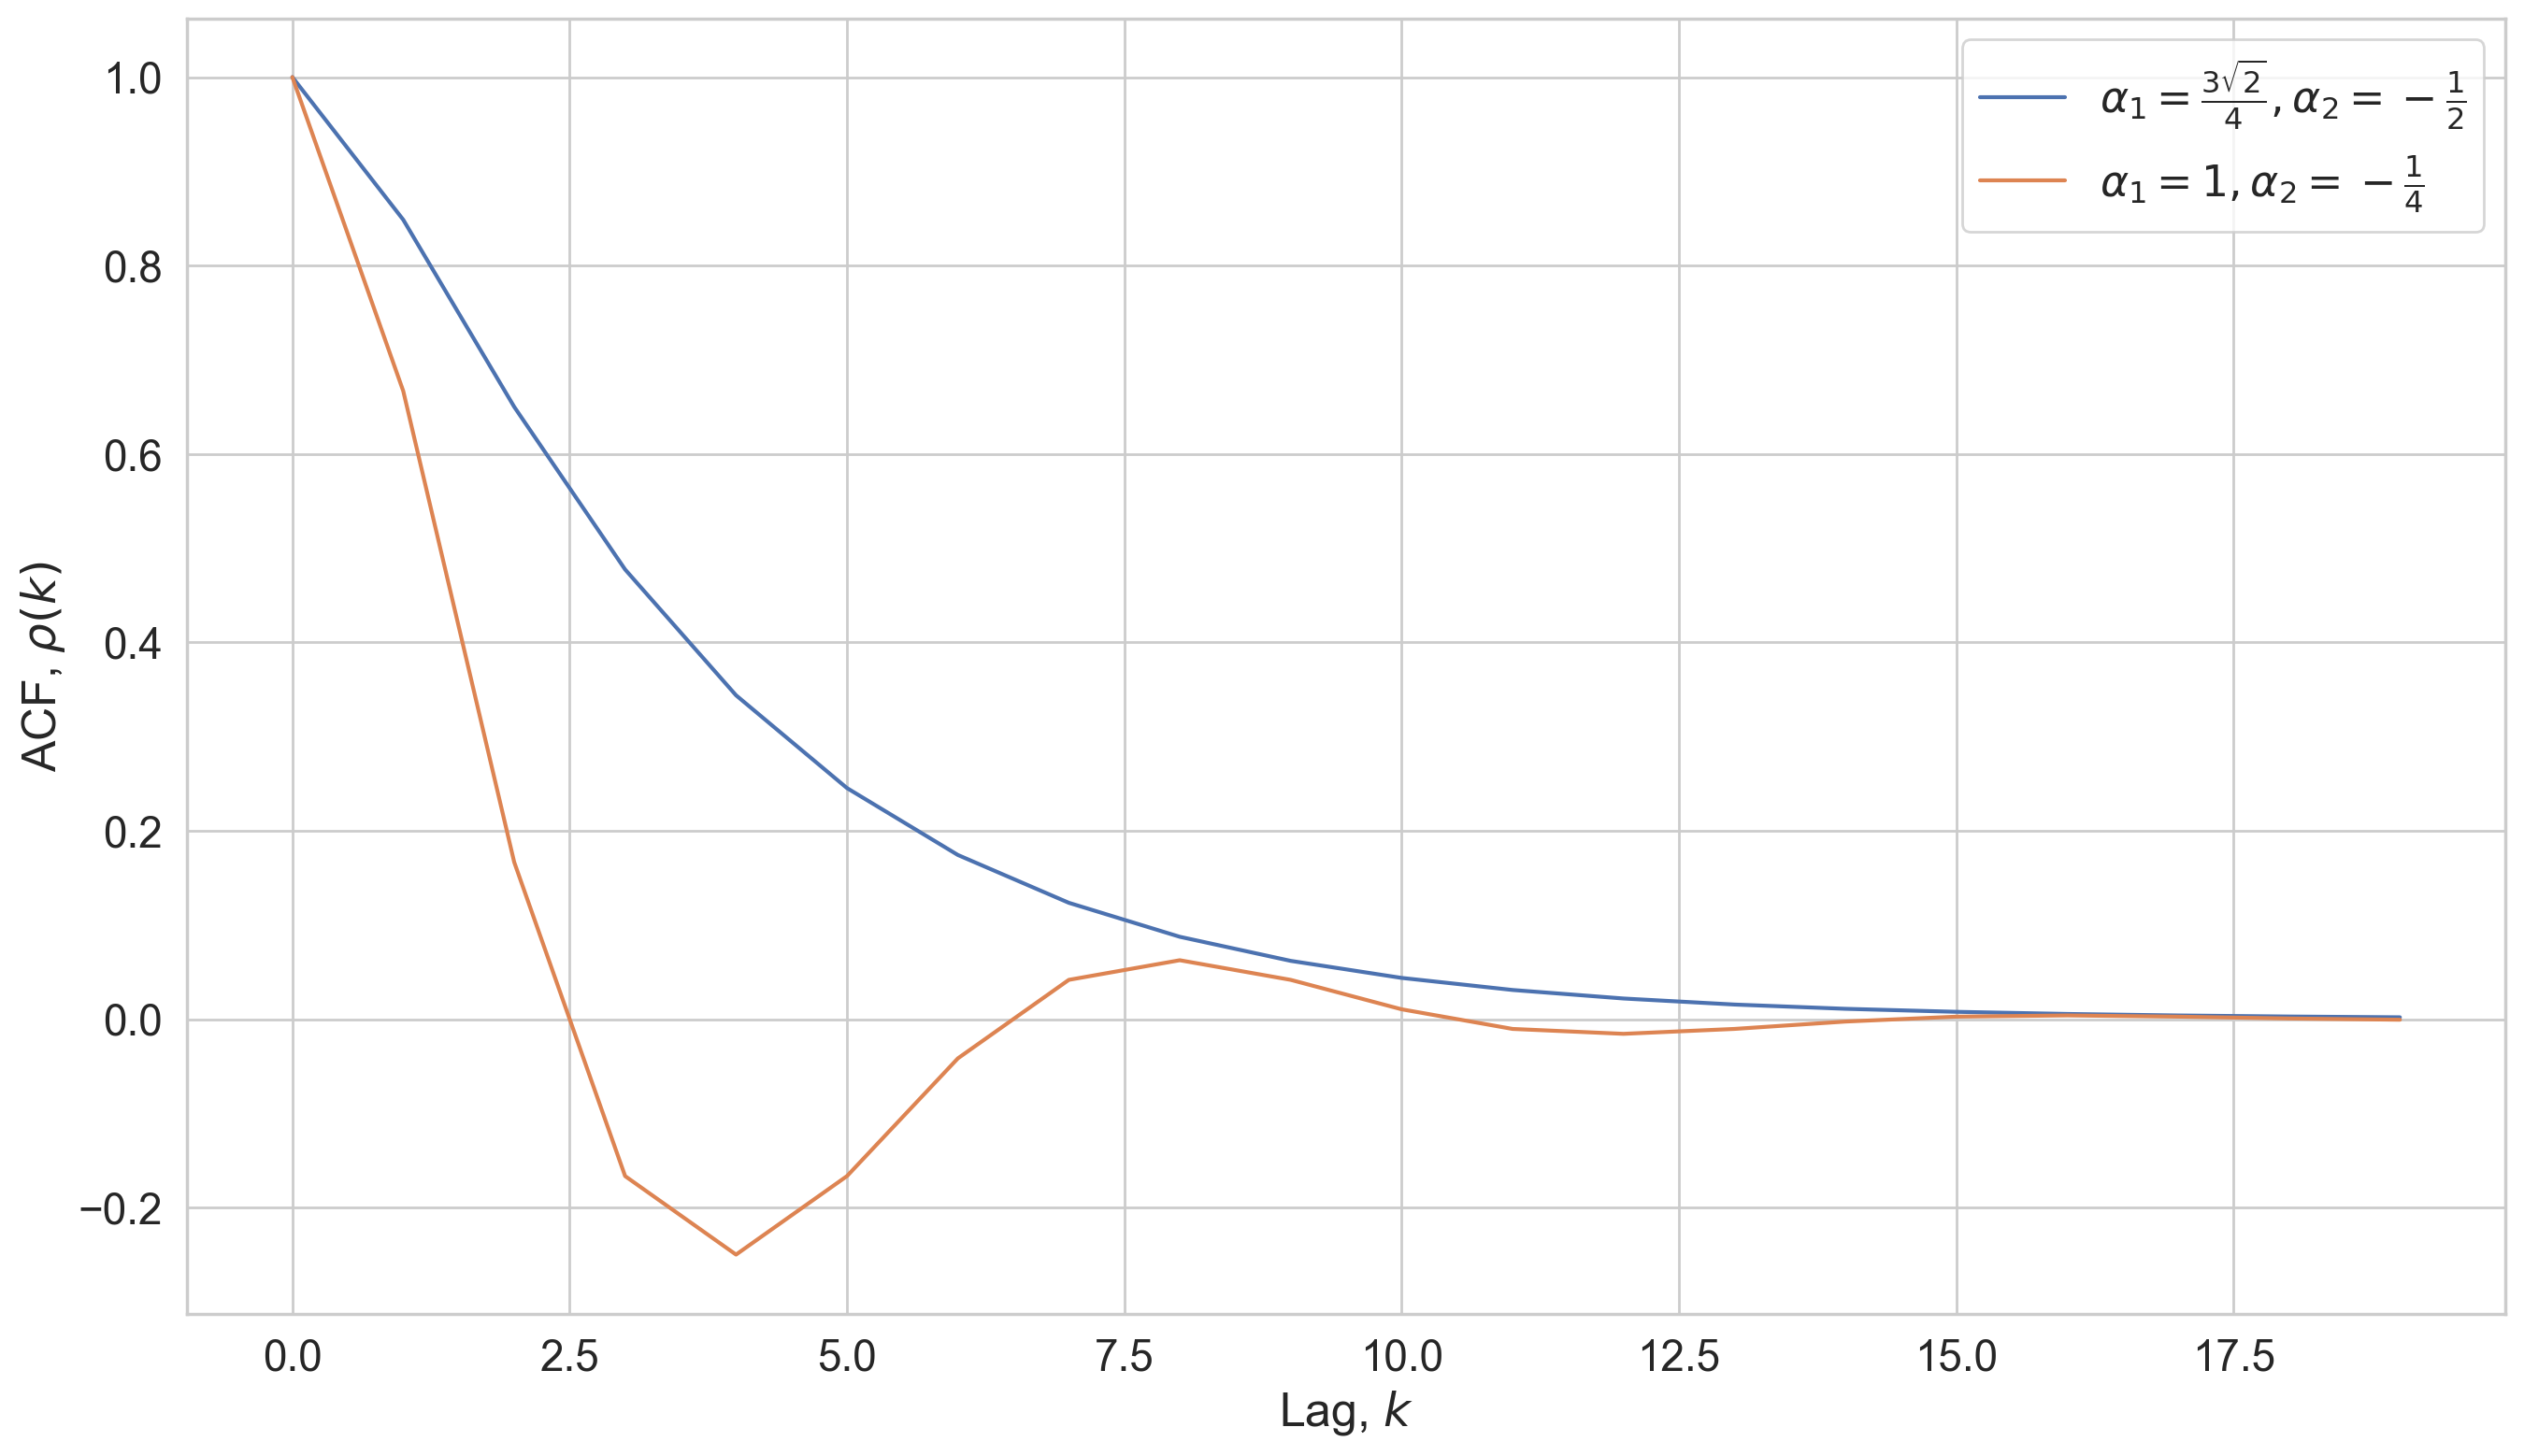

In [15]:
kk = np.arange(20)

alpha_1 = 3 * np.sqrt(2) / 4
alpha_2 = -0.25
pi_1 = (alpha_1 + np.sqrt(alpha_1**2 + 4 * alpha_2)) / 2
pi_2 = (alpha_1 - np.sqrt(alpha_1**2 + 4 * alpha_2)) / 2
a_1 = (alpha_1 / (1 - alpha_2) - pi_2) / (pi_1 - pi_2)
a_2 = 1 - a_1
acf_ar_2_sqrt2_m14 = a_1 * pi_1**kk + a_2 * pi_2**kk

acf_ar_2_1_m12 = (1 / np.sqrt(2)) ** kk * (
    np.cos(np.pi * kk / 4) + np.sin(np.pi * kk / 4) / 3
)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(
    kk,
    acf_ar_2_sqrt2_m14,
    label="$\\alpha_1 = \\frac{3 \\sqrt{2}}{4}, \\alpha_2 = - \\frac{1}{2}$",
)
ax.plot(kk, acf_ar_2_1_m12, label="$\\alpha_1 = 1, \\alpha_2 = - \\frac{1}{4}$")
ax.set_xlabel("Lag, $k$")
ax.set_ylabel("ACF, $\\rho(k)$")
ax.legend();

## ARMA

A mixed autoregressive/moving-average process containing $p$ AR terms and $q$ MA terms is said to be an $ARMA(p, q)$:
$$
X_t = \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}
$$

Using backshift operator:
$$
\phi(B) X_t = \theta(B) Z_t
$$
where
$$
\begin{aligned}
\phi(B) & = 1 - \alpha_1 B - \ldots - \alpha_p B^p, \\
\theta(B) & = 1 + \beta_1 B + \ldots + \beta_q B^q
\end{aligned}
$$

The conditions for stationarity and invertibility are the same as for a pure AR or pure MA process, namely, ARMA will be stationary if roots of
$$
\phi(B) = 0
$$
lie outside the unit circle, and will be invertible if roots of
$$
\theta(B) = 0
$$
lie outside the unit circe.

## A note on mean

If mean of the series is $\mu \neq 0$, we can do the following e.g. for $AR(p)$ process:
$$
X_t - \mu = \alpha_1 (X_{t-1} - \mu) + \ldots + \alpha_p (X_{t-p} - \mu) + Z_t
$$
or
$$
X_t = \alpha_0 + \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t
$$
where $\alpha_0 = \mu (1 - \alpha_1 - \ldots - \alpha_p)$.

All properties persist. Analagous reasoning for MA and ARMA.

## Wold's theorem

A famous result states that every stationary time series can be written as the sum of two infinite time series, one purely deterministic and one purely stochastic, i.e. an infinite-order ARMA process. It should be taken with a grain of salt, because in reality we do not use inifinite order processes, as there will be too many parameters to estimate. However, we can hope that we can approximate a stationary process with a sufficiently high-order ARMA process with good approximation error.

## Differencing

In practice most time series are non-stationary. In order to fit a stationary model to a non-stationary series $X_t$, we need to remove non-stationarity. One quick way to deal with certain types of non-stationarity is to perform differencing of order $d$, i.e. replace the process with its differences $\nabla^d X_t = X_t - X_{t - d}$. If we then fit a model on the differenced time series, such a model would be called an **integrated** model, as the outputs of this model have to be summed or "integrated" to provide a model for the original series.

## ARIMA

Consider $W_t = \nabla^d X_t = (1 - B)^d X_t$, and then an $ARMA(p, q)$ model of $W_t$:
$$
W_t = \alpha_1 W_{t-1} + \ldots + \alpha_p W_{t-p} + Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}
$$

Using backward shift operator, we write:
$$
\phi(B) W_t = \theta(B) Z_t
$$
or
$$
\phi(B) (1 - B)^d X_t = \theta(B) Z_t
$$

The former equation is $ARMA(p, q)$ of $W_t$, while the latter equation is $ARIMA(p, d, q)$ of $X_t$.

## SARIMA

ARIMA models can be generalized to include seasonal terms. Consider series $X_t$ with seasonal cycle of length $S$. Let's take $ARMA(p, q)$ model:
$$
X_t = \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}
$$
and add $P$ AR components:
$$
+ \alpha_S X_{t-S} + \alpha_{2S} X_{t-2S} + \ldots + \alpha_{PS} X_{t-PS}
$$
and add $Q$ MA components:
$$
+ \beta_S Z_{t-S} + \beta_{2S} Z_{t-2S} + \ldots + \beta_{PS} Z_{t-QS}
$$

Such model is called $SARMA(p, q) \times (P, Q)$. We can get model $SARIMA(p, d, q) \times (P, D, Q)$, if we apply additionally differencing of order $d$ and seasonal differencing of order $D$ to the series.

# Webinar

## Testing stationarity

There are two main tools to test if series is stationary or not. There are more, but these two are sufficient.

- KPSS (Kwiatkowski-Philips-Schmidt-Shin) test. Null hypothesis is that series is stationary, alternative is that there is trend.
- Dickey–Fuller test. Null hypothesis is that series is non-stationary, alternative is that series is stationary.

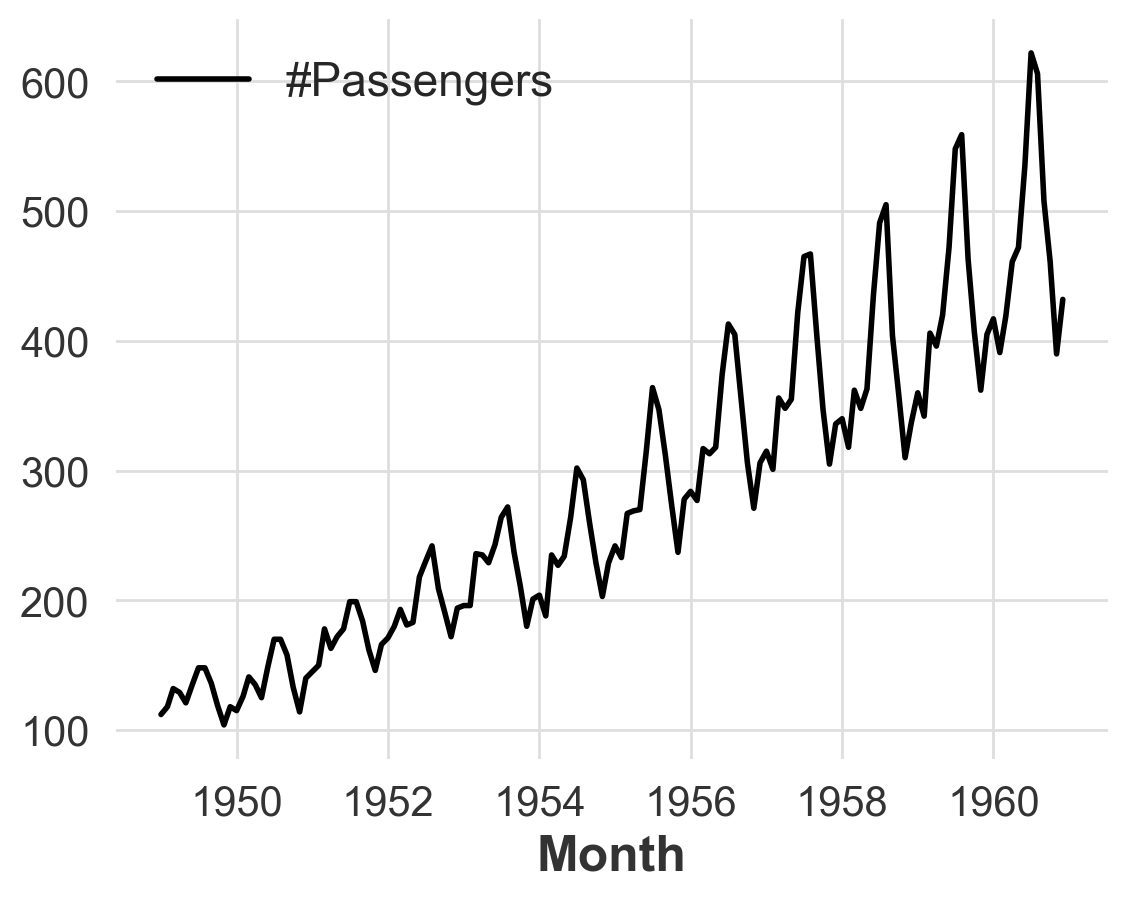

In [17]:
air_pax = ds.AirPassengersDataset().load()
air_pax.plot();

In [25]:
_, p_value, _, _ = sm.stattools.kpss(air_pax.values())
print("rejected" if p_value < 0.05 else "not rejected")

rejected


/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_69757/1436353784.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  _, p_value, _, _ = sm.stattools.kpss(air_pax.values())


In [27]:
_, p_value, _, _, _, _ = sm.stattools.adfuller(air_pax.values())
print("rejected" if p_value < 0.05 else "not rejected")

not rejected


## Differencing

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_69757/762563292.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  air_pax.plot(ax=ax[0], label=f"KPSS p-value {sm.stattools.kpss(air_pax.values())[1]:.2f}");
/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_69757/762563292.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  air_pax.diff().plot(ax=ax[1], label=f"KPSS p-value {sm.stattools.kpss(air_pax.diff().values())[1]:.2f}");
/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_69757/762563292.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  air_pax.diff(12).plot(ax=ax[2], label=f"KPSS p-value

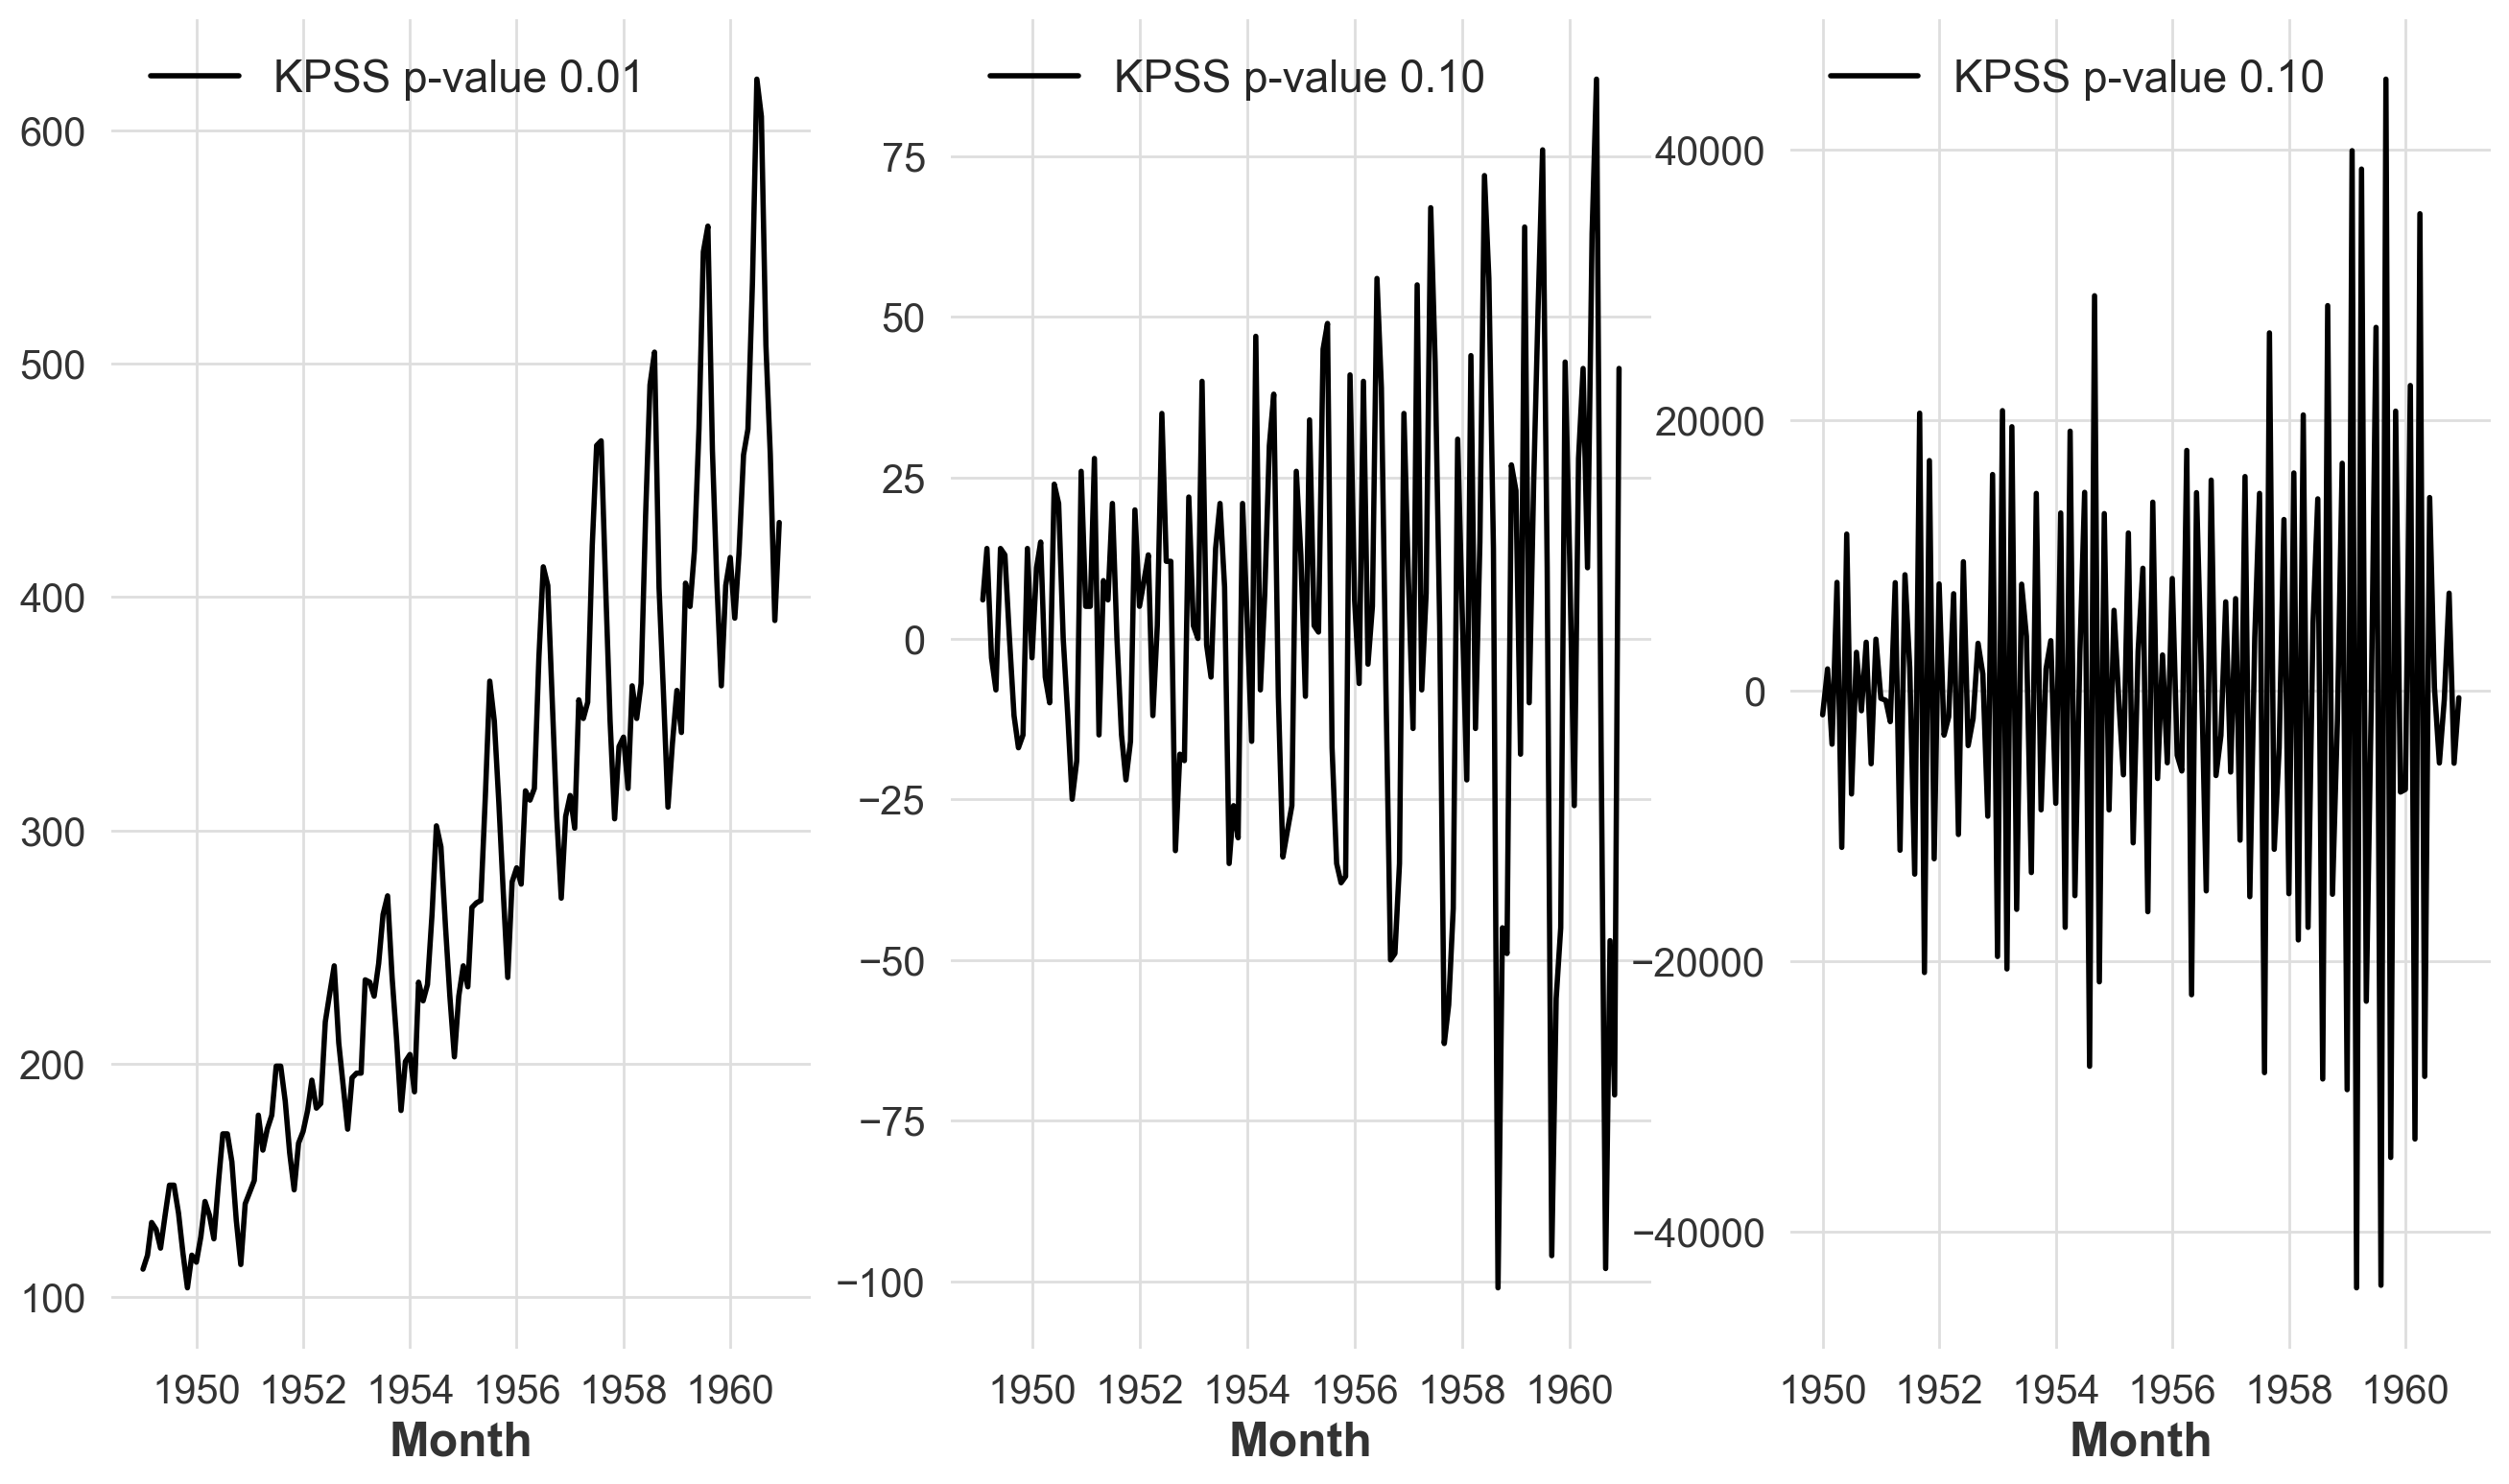

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(16, 9))
air_pax.plot(
    ax=ax[0], label=f"KPSS p-value {sm.stattools.kpss(air_pax.values())[1]:.2f}"
)
air_pax.diff().plot(
    ax=ax[1], label=f"KPSS p-value {sm.stattools.kpss(air_pax.diff().values())[1]:.2f}"
)
air_pax.diff(12).plot(
    ax=ax[2],
    label=f"KPSS p-value {sm.stattools.kpss(air_pax.diff(12).values())[1]:.2f}",
);

In [46]:
air_pax_log = air_pax.map(lambda ts, x: sts.boxcox(x, lmbda=0.1))

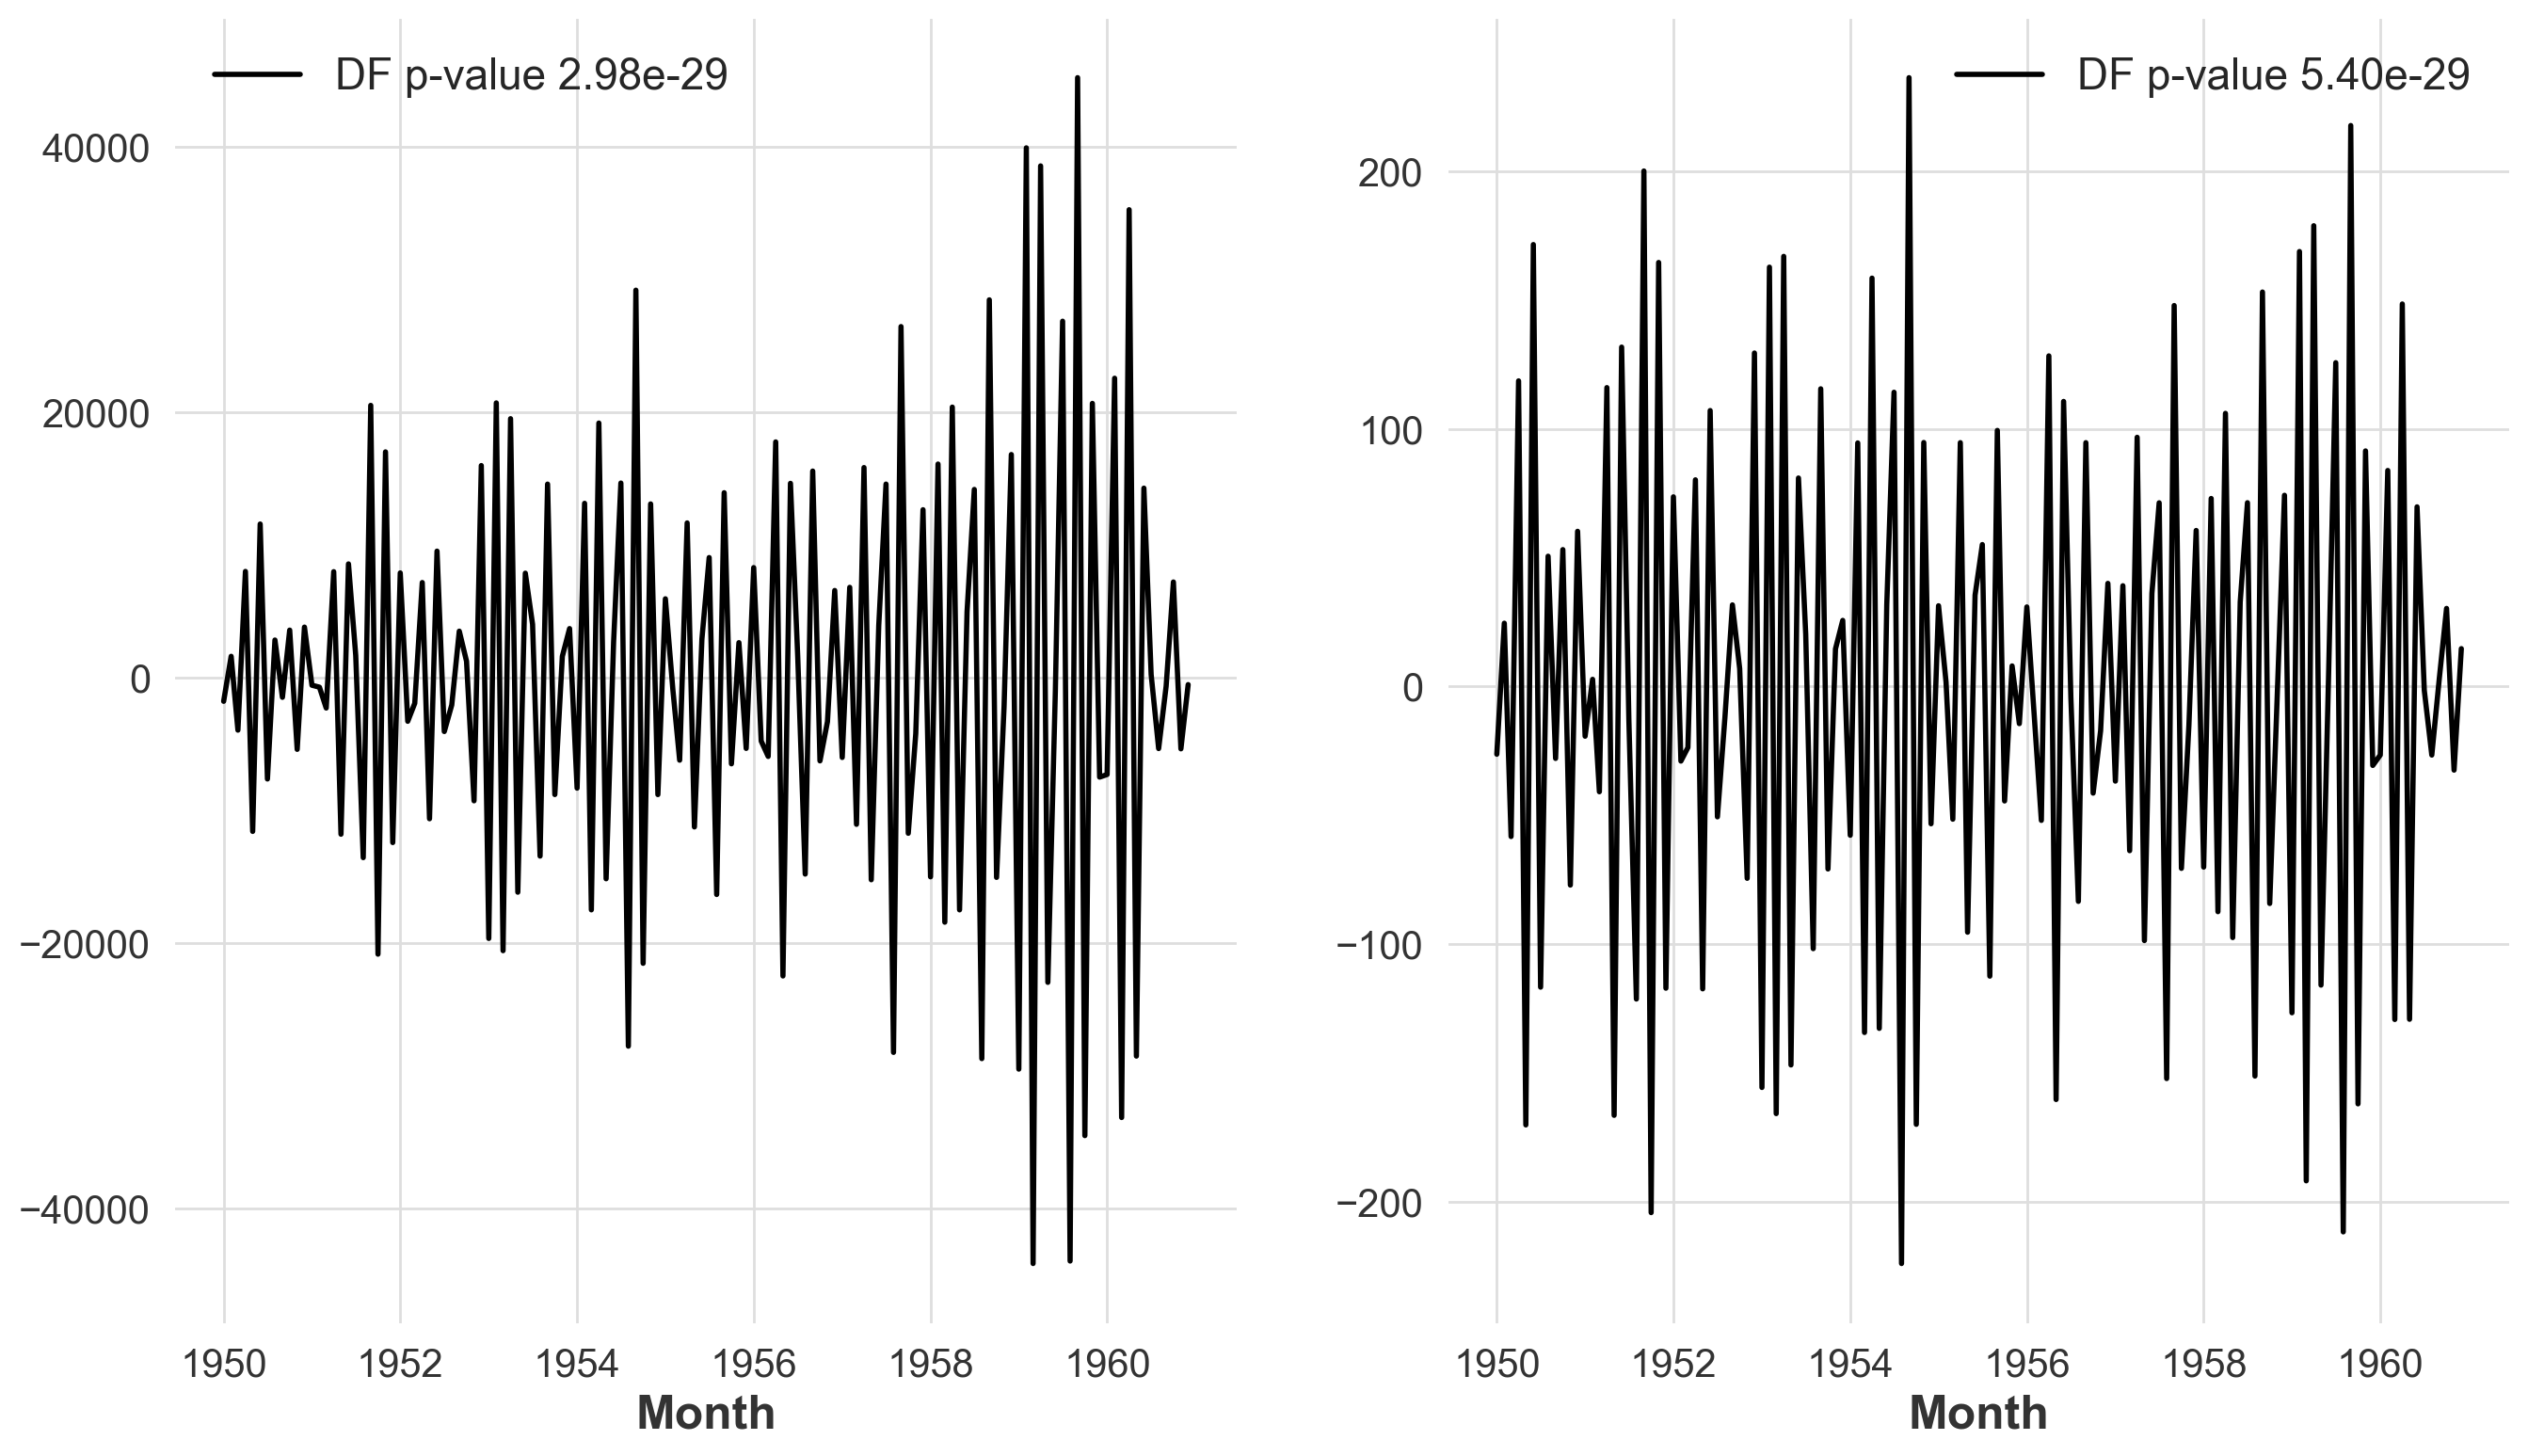

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
air_pax.diff(12).plot(
    ax=ax[0],
    label=f"DF p-value {sm.stattools.adfuller(air_pax.diff(12).values())[1]:.2e}",
)
air_pax_log.diff(12).plot(
    ax=ax[1],
    label=f"DF p-value {sm.stattools.adfuller(air_pax_log.diff(12).values())[1]:.2e}",
);

## Residuals

## Necessary properties of residuals

## Desired properties of residuals

## Testing properties of residuals